## Anna Remler

# Setup Data

In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [4]:
# Checking to see if API works
import requests
url = "https://superheroapi.com/api/10229722834886310/70/biography"
response = requests.get(url)
response.json()

{'response': 'success',
 'id': '70',
 'name': 'Batman',
 'full-name': 'Bruce Wayne',
 'alter-egos': 'No alter egos found.',
 'aliases': ['Insider', 'Matches Malone'],
 'place-of-birth': 'Crest Hill, Bristol Township; Gotham County',
 'first-appearance': 'Detective Comics #27',
 'publisher': 'DC Comics',
 'alignment': 'good'}

In [5]:
url = "https://superheroapi.com/api/10229722834886310/70/powerstats"
response = requests.get(url)
response.json()

{'response': 'success',
 'id': '70',
 'name': 'Batman',
 'intelligence': '100',
 'strength': '26',
 'speed': '27',
 'durability': '50',
 'power': '47',
 'combat': '100'}

In [7]:
# Download specific data. In this case, bio.
database_bio = []
for i in range(1, 732):
    url = f"https://superheroapi.com/api/10229722834886310/{i}/biography"
    response = requests.get(url).json()
    database_bio.append(response)

In [8]:
# Download specific data. In this case, powerstats.
database_ps = []
for i in range(1, 732):
    url = f"https://superheroapi.com/api/10229722834886310/{i}/powerstats"
    response = requests.get(url).json()
    database_ps.append(response)

In [9]:
#create dataframes
df_bio= pd.DataFrame(database_bio)
df_ps= pd.DataFrame(database_ps)

In [10]:
#And combine
combined_df = pd.concat([df_bio, df_ps], axis=1, join='inner')
display(combined_df)

,response,id,name,full-name,alter-egos,aliases,place-of-birth,first-appearance,publisher,alignment,response,id,name,intelligence,strength,speed,durability,power,combat
0,success,1,A-Bomb,Richard Milhouse Jones,No alter egos found.,[Rick Jones],"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good,success,1,A-Bomb,38,100,17,80,24,64
1,success,2,Abe Sapien,Abraham Sapien,No alter egos found.,"[Langdon Everett Caul, Abraham Sapien, Langdon...",-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good,success,2,Abe Sapien,88,28,35,65,100,85
2,success,3,Abin Sur,,No alter egos found.,[Lagzia],Ungara,"Showcase #22 (October, 1959)",DC Comics,good,success,3,Abin Sur,50,90,53,64,99,65
3,success,4,Abomination,Emil Blonsky,No alter egos found.,"[Agent R-7, Ravager of Worlds]","Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,bad,success,4,Abomination,63,80,53,90,62,95
4,success,5,Abraxas,Abraxas,No alter egos found.,[-],Within Eternity,Fantastic Four Annual #2001,Marvel Comics,bad,success,5,Abraxas,88,63,83,100,100,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,success,727,Yellowjacket II,Rita DeMara,No alter egos found.,[-],-,Avengers #264,Marvel Comics,good,success,727,Yellowjacket II,50,10,35,28,31,28
727,success,728,Ymir,Ymir,No alter egos found.,[Aurgelmir],Niffleheim,JOURNEY INTO MYSTERY #97,Marvel Comics,good,success,728,Ymir,50,100,27,100,98,28
728,success,729,Yoda,Yoda,No alter egos found.,[-],-,Star Wars: Episode V - The Empire Strikes Back...,George Lucas,good,success,729,Yoda,88,52,33,25,100,90
729,success,730,Zatanna,Zatanna Zatara,No alter egos found.,[-],-,Hawkman #4,DC Comics,good,success,730,Zatanna,81,10,23,28,100,56


In [13]:
# Extracting and cleaning data so that it is just DC properties
df_dc= combined_df.loc[
    (combined_df["publisher"]== "DC Comics") |
    (combined_df["publisher"]== "Dark Horse Comics")|
    (combined_df["publisher"]== "Hanna-Barbera") | 
    (combined_df["publisher"]== "Wildstorm") | 
    (combined_df["publisher"]== "Oracle") |
    (combined_df["publisher"]== "Nightwing") |
    (combined_df["publisher"]== "Spoiler") |
    (combined_df["publisher"]== "Misfit") |
    (combined_df["publisher"]== "Robin III") |
    (combined_df["publisher"]== "Batman II") |
    (combined_df["publisher"]== "Flash IV") |
    (combined_df["publisher"]== "Batgirl") |
    (combined_df["publisher"]== "Robin II") |
    (combined_df["publisher"]== "Robin III") |
    (combined_df["publisher"]== "Red Robin") |
    (combined_df["publisher"]== "Superman Prime One-Million") |
    (combined_df["publisher"]== "Arsenal") |
    (combined_df["publisher"]== "Aztar") |
    (combined_df["publisher"]== "Angel") |
    (combined_df["publisher"]== "Meltdown") |
    (combined_df["publisher"]== "Tempest") |
    (combined_df["publisher"]== "Huntress") |
    (combined_df["publisher"]== "Impulse") |
    (combined_df["publisher"]== "Power Woman") |
    (combined_df["publisher"]== "Atlas") |
    (combined_df["publisher"]== "Batgirl III")]

In [14]:
# Extracting and cleaning data so that it is just Marvel properties
df_marvel= combined_df.loc[
    (combined_df["publisher"]== "Marvel Comics")|
    (combined_df["publisher"]== "Sharon Carter") |
    (combined_df["publisher"]== "Deadpool") |
    (combined_df["publisher"]== "Evil Deadpool") |
    (combined_df["publisher"]== "Goliath") |
    (combined_df["publisher"]== "Ant-Man") |
    (combined_df["publisher"]== "Binary") |
    (combined_df["publisher"]== "Deadpool") |
    (combined_df["publisher"]== "Sony Pictures") |
    (combined_df["publisher"]== "Anti-Vision") |
    (combined_df["publisher"]== "Speedball") |
    (combined_df["publisher"]== "Jean Grey") |
    (combined_df["publisher"]== "She-Thing") |
    (combined_df["publisher"]== "Boom-Boom") |
    (combined_df["publisher"]== "Luke Cage") |
    (combined_df["publisher"]== "Vindicator II") |
    (combined_df["publisher"]== "Blaquesmith") |
    (combined_df["publisher"]== "Scorpion") |
    (combined_df["publisher"]== "Warpath") |
    (combined_df["publisher"]== "Rune King Thor") |
    (combined_df["publisher"]== "Angel Salvadore") |
    (combined_df["publisher"]== "Scarlet Spider") |
    (combined_df["publisher"]== "Iron Lad") |
    (combined_df["publisher"]== "Penance II") |
    (combined_df["publisher"]== "Ms Marvel II") |
    (combined_df["publisher"]== "Venom III") |
    (combined_df["publisher"]== "Spider-Carnage") |
    (combined_df["publisher"]== "Power Man") |
    (combined_df["publisher"]== "Rebellion") |
    (combined_df["publisher"]== "Giant-Man") |
    (combined_df["publisher"]== "Vertigo II") |
    (combined_df["publisher"]== "Gemini V") |
    (combined_df["publisher"]== "Toxin") |
    (combined_df["publisher"]== "Hawkeye")]

# Who has the higher villain to hero ratio?

In [15]:
# Both testing the code but also curious about the overall numbers
combined_df["alignment"].value_counts()

good       494
bad        206
neutral     24
-            7
Name: alignment, dtype: int64

In [16]:
# Counting DC character alignment
count_dc = df_dc["alignment"].value_counts()
count_dc

good       153
bad         66
neutral     13
-            1
Name: alignment, dtype: int64

In [17]:
# Counting Marvel character alignment
count_marvel = df_marvel["alignment"].value_counts()
count_marvel

good       252
bad        113
neutral     11
-            3
Name: alignment, dtype: int64

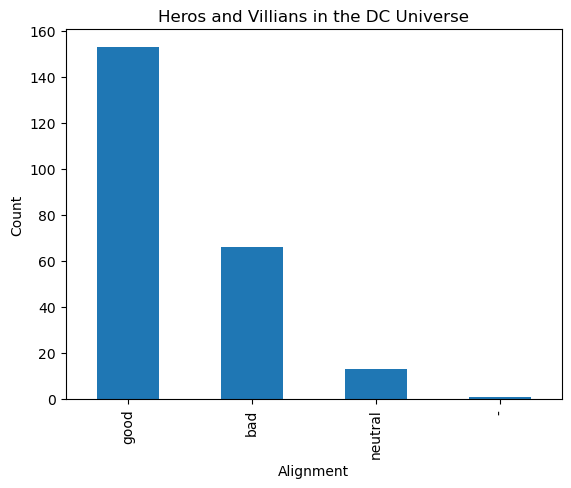

In [18]:
#Bar Chart outlining alignment in DC Universe
plt.xlabel("Alignment")
plt.ylabel("Count")

plt.title("Heros and Villians in the DC Universe")

bar_plot = count_dc.plot.bar()

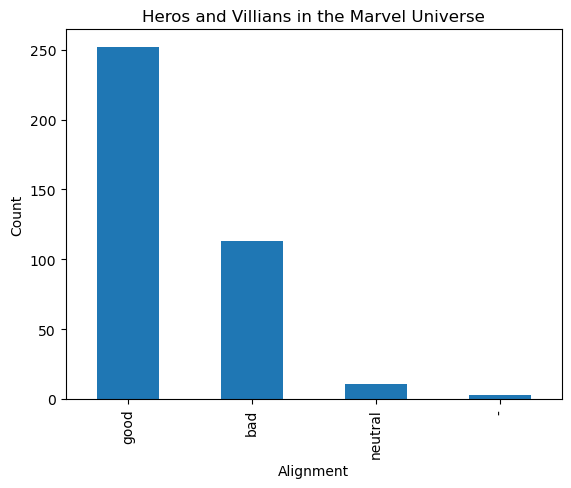

In [19]:
#Bar Chart outlining alignment in Marvel Universe
plt.xlabel("Alignment")
plt.ylabel("Count")

plt.title("Heros and Villians in the Marvel Universe")

bar_plot = count_marvel.plot.bar()

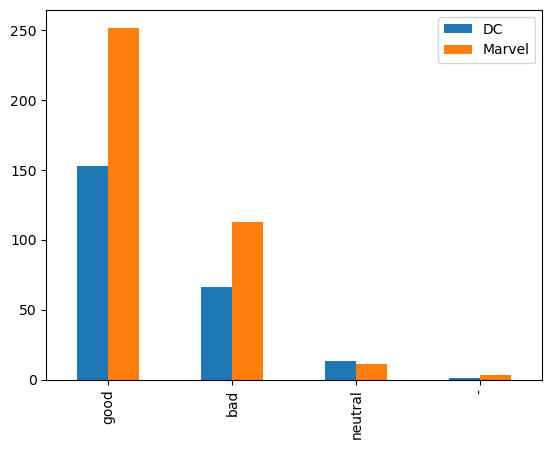

In [20]:
# It would be better to combine the data and show them side by side
plotdata = pd.DataFrame({
    "DC":[153, 66, 13, 1],
    "Marvel":[252, 113, 11, 3]},
    index=["good", "bad", "neutral", "-"])

bar_plot = plotdata.plot.bar()

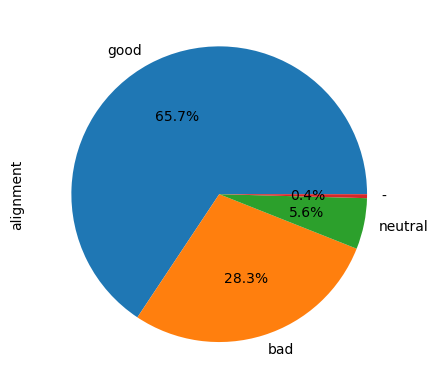

In [21]:
# Pie plot to focus on the ratio. This is DC
count_dc.plot.pie(autopct = "%1.1f%%")
plt.show()

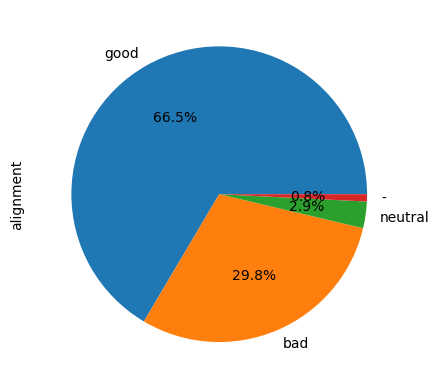

In [22]:
# And this is Marvel
count_marvel.plot.pie(autopct = "%1.1f%%")
plt.show()

# Ratio of strength

In [23]:
# Who is the most powerful villians
df_dc_good = df_dc.loc[(df_dc["alignment"]== "good")]
df_dc_bad = df_dc.loc[(df_dc["alignment"]== "bad")]
df_marvel_good = df_marvel.loc[(df_marvel["alignment"]== "good")]
df_marvel_bad = df_marvel.loc[(df_marvel["alignment"]== "bad")]

In [24]:
# Exporting data to clean and add
df_dc_good.to_csv("powercount_dc_good.csv")
df_dc_bad.to_csv("powercount_dc_bad.csv")
df_marvel_good.to_csv("powercount_marvel_good.csv")
df_marvel_bad.to_csv("powercount_marvel_bad.csv")

In [28]:
df_dc_good = pd.read_csv("powercount_dc_good.csv")
df_dc_bad = pd.read_csv("powercount_dc_bad.csv")
df_marvel_good = pd.read_csv("powercount_marvel_good.csv")
df_marvel_bad = pd.read_csv("powercount_marvel_bad.csv")

In [29]:
# Now am just looking at only heros in the DC Universe
dc_power_good = df_dc_good[
    ["name", "intelligence", "strength", "speed", "durability", "power", "combat", "total power"]
]
dc_power_good

,name,intelligence,strength,speed,durability,power,combat,total power
0,Superman,94.0,100.0,100.0,100.0,100.0,85.0,579
1,Martian Manhunter,100.0,95.0,92.0,100.0,100.0,85.0,572
2,Power Girl,94.0,100.0,100.0,100.0,100.0,75.0,569
3,Supergirl,94.0,100.0,100.0,100.0,100.0,75.0,569
4,Wonder Woman,88.0,100.0,79.0,100.0,100.0,100.0,567
...,...,...,...,...,...,...,...,...
148,Mogo,NaN,NaN,NaN,NaN,NaN,NaN,0
149,Plastic Lad,NaN,NaN,NaN,NaN,NaN,NaN,0
150,Shrinking Violet,NaN,NaN,NaN,NaN,NaN,NaN,0
151,Silk Spectre,NaN,NaN,NaN,NaN,NaN,NaN,0


In [30]:
# Now looking at only villains in the DC Universe
dc_power_bad = df_dc_bad[
    ["name", "intelligence", "strength", "speed", "durability", "power", "combat", "total power"]
]
dc_power_bad

,name,intelligence,strength,speed,durability,power,combat,total power
0,General Zod,94.0,100.0,96.0,100.0,100.0,95.0,585
1,Superboy-Prime,94.0,100.0,100.0,100.0,100.0,85.0,579
2,Steppenwolf,94.0,100.0,83.0,100.0,100.0,100.0,577
3,Big Barda,88.0,100.0,79.0,100.0,100.0,100.0,567
4,Darkseid,88.0,100.0,83.0,100.0,100.0,95.0,566
...,...,...,...,...,...,...,...,...
61,Clock King,75.0,10.0,17.0,10.0,7.0,40.0,159
62,Trigon,NaN,99.0,NaN,NaN,NaN,NaN,99
63,Granny Goodness,NaN,96.0,NaN,NaN,NaN,NaN,96
64,Moloch,NaN,NaN,NaN,NaN,NaN,NaN,0


In [31]:
# This is the strength of Marvel Heroes
marvel_power_good = df_marvel_good[
    ["name", "intelligence", "strength", "speed", "durability", "power", "combat", "total power"]
]
marvel_power_good

,name,intelligence,strength,speed,durability,power,combat,total power
0,Captain Universe,100.0,100.0,100.0,100.0,100.0,100.0,600
1,Beyonder,100.0,100.0,100.0,100.0,100.0,84.0,584
2,Stardust,88.0,85.0,100.0,110.0,100.0,85.0,568
3,Phoenix,100.0,100.0,83.0,100.0,100.0,80.0,563
4,Thor,69.0,100.0,83.0,100.0,100.0,100.0,552
...,...,...,...,...,...,...,...,...
247,Vision II,NaN,NaN,NaN,NaN,NaN,NaN,0
248,Warbird,NaN,NaN,NaN,NaN,NaN,NaN,0
249,White Queen,NaN,NaN,NaN,NaN,NaN,NaN,0
250,Wiz Kid,NaN,NaN,NaN,NaN,NaN,NaN,0


In [32]:
# And Marvel villains.
marvel_power_bad = df_marvel_bad[
    ["name", "intelligence", "strength", "speed", "durability", "power", "combat", "total power"]
]
marvel_power_bad

,name,intelligence,strength,speed,durability,power,combat,total power
0,Dormammu,88.0,95.0,83.0,100.0,100.0,80.0,546
1,Magus,88.0,100.0,70.0,99.0,100.0,74.0,531
2,Thanos,100.0,100.0,33.0,100.0,100.0,80.0,513
3,Fallen One II,88.0,85.0,83.0,100.0,100.0,56.0,512
4,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0,493
...,...,...,...,...,...,...,...,...
108,Razor-Fist II,NaN,NaN,NaN,NaN,NaN,NaN,0
109,Snake-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,0
110,Spider-Woman IV,NaN,NaN,NaN,NaN,NaN,NaN,0
111,Weapon XI,NaN,NaN,NaN,NaN,NaN,NaN,0
